In [1]:
cd C:\Users\narkh\Downloads

C:\Users\narkh\Downloads


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px

In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [18]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


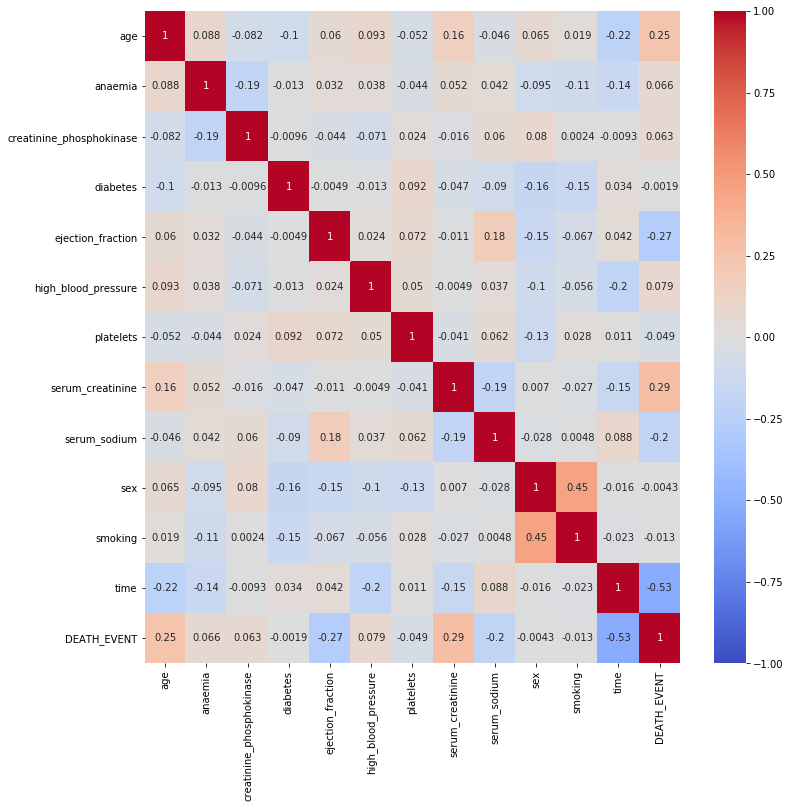

In [36]:
fig = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True)

[0.08716445 0.02766842 0.07852832 0.03354883 0.13563795 0.02322142
 0.07367412 0.11506876 0.08627108 0.02475215 0.02718762 0.28727689]


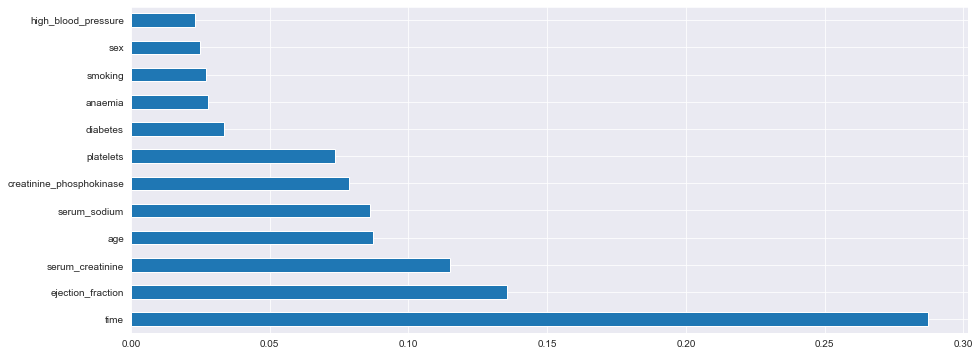

In [71]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = data.iloc[:, :-1]
y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

We can select following columns for Model Building:
- Time
- ejection_fraction
- serum_creatinine
- age

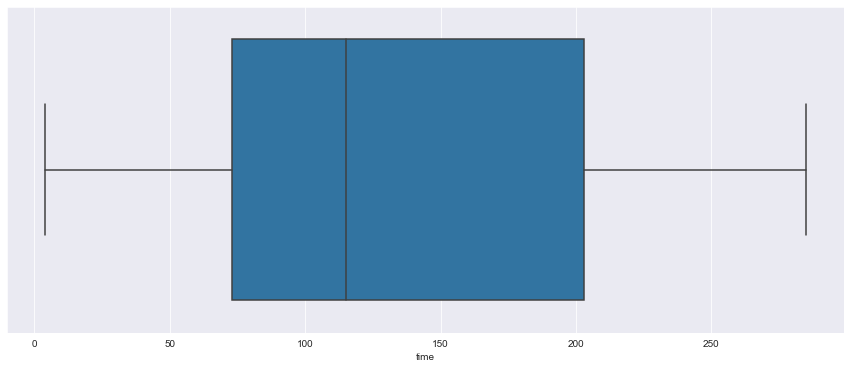

In [73]:
sns.boxplot(data['time'])

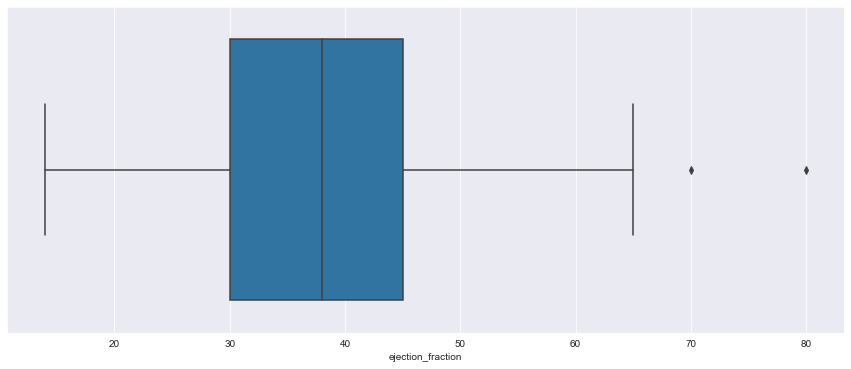

In [76]:
sns.boxplot(data['ejection_fraction'])

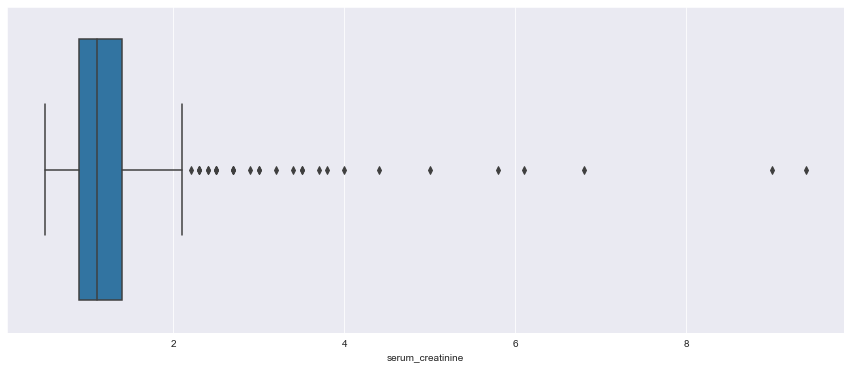

In [77]:
sns.boxplot(data['serum_creatinine'])

- Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.
- Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that exist within each feature, removing outliers becomes tricky.

- When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
- They are actual data points that helps in predicting DEATH_EVENT. 

## Data Modeling

In [37]:
X = data[['time','ejection_fraction','serum_creatinine','age']]
y = data['DEATH_EVENT']

In [44]:
# Splitting Data for Training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2698)

- Logistic Regression

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
ypred1 = log_reg.predict(X_test)

In [48]:
ac1 = accuracy_score(y_test,ypred1)
print("Accuracy of model using Logistic regression: ", ac1*100, "%")

Accuracy of model using Logistic regression:  90.0 %


In [60]:
confusion_matrix(y_test,ypred1)

array([[45,  2],
       [ 4,  9]], dtype=int64)

- Random Forest

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred2 = rf.predict(X_test)

In [52]:
ac2 = accuracy_score(y_test,ypred2)
print("Accuracy of model using Random Forest: ", round(ac2*100), "%")

Accuracy of model using Random Forest:  97.0 %


In [61]:
confusion_matrix(y_test,ypred2)

array([[45,  2],
       [ 0, 13]], dtype=int64)

- GradientBoost Classifier

In [56]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train)
ypred3 = xgb.predict(X_test)

In [59]:
ac3 = accuracy_score(y_test,ypred3)
print("Accuracy of model using Gradient Boost Classifier: ", round(ac3*100), "%")

Accuracy of model using Gradient Boost Classifier:  93.0 %


In [62]:
confusion_matrix(y_test,ypred3)

array([[45,  2],
       [ 2, 11]], dtype=int64)

Accuracy of all Models:
- Logistic Regression : 90 %
- Random Forest : 97 %
- Gradient Boosting Classifier : 93%

We can see that Random Forest algorithm Gives best accuracy of 97% for Heart Failure Prediction